In [1]:
import os
import sys
from ga_regression import *

data_file = Path(r"C:\Users\dg\Documents\python\cemetery\downloads\run00063_resynth\run00063_data.hdf")
data_dir = data_file.parent
log_file = data_dir / 'log.txt'

opts = Options(
    data_file=data_file,
    data_dir=data_dir,
    log_file=log_file,
    channel=13,
    n_epoch=100,
    input_features='hks',
    dropout=True,
    mesh_file_mode='simplified',
    norm_verts=False,
    norm_response=True,
    args=None,
)

exp = opts.experiment()
train_loader = DataLoader(exp.train_dataset, batch_size=None, shuffle=True)
test_loader = DataLoader(exp.test_dataset, batch_size=None)
model_save_path = str(opts.data_dir / 'trained.pth')
exp.model.load_state_dict(torch.load(model_save_path))

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Pre-calculating operators


  0%|                                                                                                                                      | 0/944 [00:00<?, ?it/s]C:\Users\dg\Documents\python\diffusion-net\experiments\regression_0\../../src\diffusion_net\utils.py:55: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:623.)
  return torch.sparse.FloatTensor(torch.LongTensor(indices), torch.FloatTensor(values), torch.Size(shape)).coalesce()
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 944/944 [00:07<00:00, 132.18it/s]


<All keys matched successfully>

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:08<00:00, 36.40it/s]


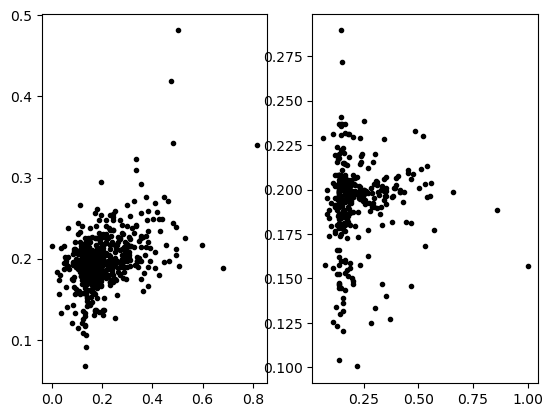

In [2]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 2)
for ax, loader in zip(axs, (train_loader, test_loader)):
    r0, r1 = exp.predict(loader)
    ax.plot(r0, r1, 'k.')